# Modelling

In [1]:
#conda activate tfm-electricity-prices-env
#python -m ipykernel install --user --name tfm-electricity-prices-env

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from sklearn import metrics
import joblib
from joblib import dump, load
from pandas.plotting import register_matplotlib_converters

In [3]:
electricity_brent_weather = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/electricity_brent_weather_no_outliers.csv",
                                       header= 0, dtype = str, engine= "python", sep=";", error_bad_lines= False,
                                encoding= "utf-8")
electricity_brent_weather

,Date,Total €/MWh no outliers,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh original,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
0,2013-05-07,52.95,711755.1,45.17,-0.3,2.29,0.59,5.2,52.95,0.0,Martes,104.4,105.4,105.94,104.0,24.372623,13.598554,19.108723,17.46993,0.54821163
1,2013-05-08,58.96,706886.06,50.05,-0.48,3.03,1.13,5.23,58.96,0.0,Miércoles,104.34,104.11,104.8,103.53,24.171618,13.924416,19.068588,16.027378,0.33500755
2,2013-05-09,57.94,712014.94,51.04,-0.41,1.34,0.76,5.2,57.94,0.0,Jueves,104.47,104.44,104.6,103.45,23.007523,13.323574,18.14288,17.443392,2.0035484
3,2013-05-10,53.64,707860.44,46.06,-0.18,1.35,1.23,5.18,53.64,0.0,Viernes,103.91,104.35,104.45,101.56,22.321642,12.264773,17.353886,17.460852,0.044820618
4,2013-05-11,53.6,623204.7,46.15,-0.29,2.4,1.23,4.11,53.6,0.0,Sábado,103.91,104.35,104.45,101.56,21.945469,10.597996,16.243876,17.480986,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,2021-09-26,56.1,624704.1,159.19,-0.14,2.64,1.14,0.0,162.84,0.0,Domingo,78.09,77.26,78.24,76.85,25.917536,13.975994,20.005056,14.563063,0.008497892
3054,2021-09-27,56.1,684730.1,176.13,-0.25,2.23,0.54,0.38,179.04,0.0,Lunes,79.53,78.25,79.9,78.21,26.475058,13.456256,20.09907,14.319683,0.41161045
3055,2021-09-28,56.1,683173.25,182.57,-0.11,1.79,0.74,0.39,185.38,0.0,Martes,79.09,79.4,80.75,78.1,25.37523,13.199469,19.425434,15.960168,0.025154099
3056,2021-09-29,56.1,698517.5,190.62,-0.28,3.99,1.46,0.38,196.18,0.0,Miércoles,78.64,78.25,79.4,77.5,25.286041,13.050295,19.229074,15.105579,0.16197278


In [4]:
electricity_brent_weather.set_index("Date", inplace=True)

In [5]:
#Let's converts each column to the correct data type

electricity_brent_weather['Energía final MWh'] = pd.to_numeric(electricity_brent_weather['Energía final MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Mercado diario €/MWh'] = pd.to_numeric(electricity_brent_weather['Mercado diario €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Mercado intradiario €/MWh'] = pd.to_numeric(electricity_brent_weather['Mercado intradiario €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Restricciones €/MWh'] = pd.to_numeric(electricity_brent_weather['Restricciones €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Procesos OS €/MWh'] = pd.to_numeric(electricity_brent_weather['Procesos OS €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Garantía potencia Pagos capacidad €/MWh'] = pd.to_numeric(electricity_brent_weather['Garantía potencia Pagos capacidad €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Total €/MWh no outliers'] = pd.to_numeric(electricity_brent_weather['Total €/MWh no outliers'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Total €/MWh original'] = pd.to_numeric(electricity_brent_weather['Total €/MWh original'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Coste s.interrrumpibilidad'] = pd.to_numeric(electricity_brent_weather['Coste s.interrrumpibilidad'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio cierre Brent'] = pd.to_numeric(electricity_brent_weather['Precio cierre Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio apertura Brent'] = pd.to_numeric(electricity_brent_weather['Precio apertura Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio Máximo Brent'] = pd.to_numeric(electricity_brent_weather['Precio Máximo Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio mínimo Brent'] = pd.to_numeric(electricity_brent_weather['Precio mínimo Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather["Tmax"] = pd.to_numeric(electricity_brent_weather["Tmax"], downcast="float")
electricity_brent_weather["Tmin"] = pd.to_numeric(electricity_brent_weather["Tmin"], downcast="float")
electricity_brent_weather["Tmed"] = pd.to_numeric(electricity_brent_weather["Tmed"], downcast="float")
electricity_brent_weather["Vmax"] = pd.to_numeric(electricity_brent_weather["Vmax"], downcast="float")
electricity_brent_weather["TPrec"] = pd.to_numeric(electricity_brent_weather["TPrec"], downcast="float")

In [6]:
electricity_brent_weather

,Total €/MWh no outliers,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh original,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,,,,,,,,,
2013-05-07,52.950001,711755.1250,45.169998,-0.30,2.29,0.59,5.20,52.950001,0.0,Martes,104.400002,105.400002,105.940002,104.000000,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,58.959999,706886.0625,50.049999,-0.48,3.03,1.13,5.23,58.959999,0.0,Miércoles,104.339996,104.110001,104.800003,103.529999,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,57.939999,712014.9375,51.040001,-0.41,1.34,0.76,5.20,57.939999,0.0,Jueves,104.470001,104.440002,104.599998,103.449997,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,53.639999,707860.4375,46.060001,-0.18,1.35,1.23,5.18,53.639999,0.0,Viernes,103.910004,104.349998,104.449997,101.559998,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,53.599998,623204.6875,46.150002,-0.29,2.40,1.23,4.11,53.599998,0.0,Sábado,103.910004,104.349998,104.449997,101.559998,21.945469,10.597996,16.243876,17.480986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,56.099998,624704.1250,159.190002,-0.14,2.64,1.14,0.00,162.839996,0.0,Domingo,78.089996,77.260002,78.239998,76.849998,25.917536,13.975994,20.005056,14.563063,0.008498
2021-09-27,56.099998,684730.1250,176.130005,-0.25,2.23,0.54,0.38,179.039993,0.0,Lunes,79.529999,78.250000,79.900002,78.209999,26.475058,13.456256,20.099070,14.319683,0.411610
2021-09-28,56.099998,683173.2500,182.570007,-0.11,1.79,0.74,0.39,185.380005,0.0,Martes,79.089996,79.400002,80.750000,78.099998,25.375231,13.199469,19.425434,15.960168,0.025154


In [7]:
#Also and most importantly, the Date index

electricity_brent_weather.index = pd.DatetimeIndex(electricity_brent_weather.index, dayfirst= True)


In [8]:
electricity_brent_weather.index.dtype

dtype('<M8[ns]')

In [9]:
electricity_brent_weather.dtypes

Total €/MWh no outliers                    float32
Energía final MWh                          float32
Mercado diario €/MWh                       float32
Mercado intradiario €/MWh                  float32
Restricciones €/MWh                        float32
Procesos OS €/MWh                          float32
Garantía potencia Pagos capacidad €/MWh    float32
Total €/MWh original                       float32
Coste s.interrrumpibilidad                 float32
Day                                         object
Precio cierre Brent                        float32
Precio apertura Brent                      float32
Precio Máximo Brent                        float32
Precio mínimo Brent                        float32
Tmax                                       float32
Tmin                                       float32
Tmed                                       float32
Vmax                                       float32
TPrec                                      float32
dtype: object

## ARIMA

Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data.

In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. 

Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). 

ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend). 

When the seasonality shows in a time series, the seasonal-differencing could be applied to eliminate the seasonal component.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

In [10]:
#I'm going to create a DataFrame with only the variables that I'll use in the models

models_dataset = electricity_brent_weather.drop(["Day", "Coste s.interrrumpibilidad", "Mercado diario €/MWh",
                                  "Mercado intradiario €/MWh", "Restricciones €/MWh",
                                  "Procesos OS €/MWh", "Garantía potencia Pagos capacidad €/MWh",
                                  "Total €/MWh original","Precio apertura Brent", "Precio Máximo Brent",
                                  "Precio mínimo Brent", "TPrec", "Tmed"], axis = 1)

In [11]:
models_dataset

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Tmax,Tmin,Vmax
Date,,,,,,
2013-05-07,52.950001,711755.1250,104.400002,24.372623,13.598554,17.469931
2013-05-08,58.959999,706886.0625,104.339996,24.171618,13.924416,16.027378
2013-05-09,57.939999,712014.9375,104.470001,23.007523,13.323574,17.443392
2013-05-10,53.639999,707860.4375,103.910004,22.321642,12.264773,17.460852
2013-05-11,53.599998,623204.6875,103.910004,21.945469,10.597996,17.480986
...,...,...,...,...,...,...
2021-09-26,56.099998,624704.1250,78.089996,25.917536,13.975994,14.563063
2021-09-27,56.099998,684730.1250,79.529999,26.475058,13.456256,14.319683
2021-09-28,56.099998,683173.2500,79.089996,25.375231,13.199469,15.960168


In [12]:
models_dataset.to_csv("models_dataset_no_outliers.csv", sep= ";", index = True)

In [13]:
#Let's have a look at the autocorrelation of the electricity prices variable
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

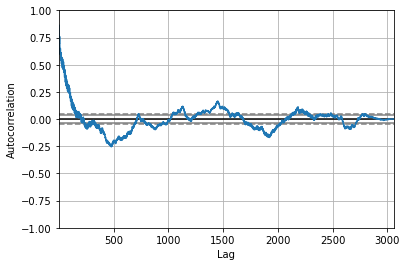

In [14]:
#There is a positive correlation aproximately in the first 250-300 lags.
autocorrelation_plot(electricity_brent_weather["Total €/MWh no outliers"])

I'm going to start with an ARIMA model, using walk-forward validation but not really estimating or accurately choosing any of the parameters of the model. This will work as a MVP.

Walk Forward Analysis does optimization on a training set; test on a period after the set and then rolls it all forward and repeats the process. We have multiple out-of-sample periods and look at these results combined.

After that, I'll check the model and will start modifying it until I think is optimal. To do this, I'll use the auto-arima function to optimise the ARIMA parameters.

I think the most important thing to notice here is that ARIMA works for univariate time series, so I will only use the electricity price to predict itself.

Also, ARIMA does not work well with seasonal data, so let's firstly check if the electricity prices are stationay or not. I will use a Dickey-Fuller test to do that.

### Checking normality in the time series / Checking Stationary in the time series - Dickey-Fuller test


Let's check if the electricity prices follow a normal distribution:

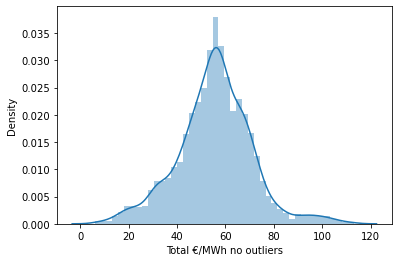

In [15]:
sns.distplot(models_dataset["Total €/MWh no outliers"]);

In [16]:
from scipy.stats import normaltest
k2, p = normaltest(models_dataset["Total €/MWh no outliers"])

alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 3.77522e-15
The null hypothesis can be rejected


Looking at the plot, it might looks like the prices follow a normal distribution, maybe with a longer right tail. However, if I test it, the electricity prices do not follow a normal distribution.

In [17]:
electricity_price = pd.DataFrame(models_dataset["Total €/MWh no outliers"])

In [18]:
electricity_price

,Total €/MWh no outliers
Date,
2013-05-07,52.950001
2013-05-08,58.959999
2013-05-09,57.939999
2013-05-10,53.639999
2013-05-11,53.599998
...,...
2021-09-26,56.099998
2021-09-27,56.099998
2021-09-28,56.099998


To test for stationarity, I'm going to use a Dickey-Fuller test:

In [19]:
from statsmodels.tsa.stattools import adfuller

y = electricity_price.values
result = adfuller(y)
print('Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Dickey-Fuller Statistic: -3.959491
p-value: 0.001638
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567


Looking at the ADF Statistic, it is likely to reject the null hypothesis and that means the electricity prices are stationary and do not depend on time.

In this case, the null hypothesis can be rejected with a significance level of less than 1% (the Dickey-Fuller statistic is lower than the critical value at 1% treeshold). 

That means, I can use an ARIMA model to forecast the electricity prices without performing any differencing.

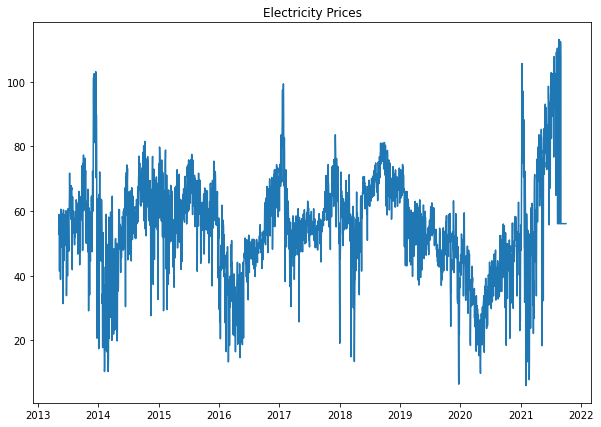

In [20]:
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(electricity_price.index, electricity_price.values);
plt.title('Electricity Prices');

### Walk-forward validation ARIMA

Not optimising any parameter or normalising the data (MPV):

Test RMSE: 8.015
Test MAE: 64.240


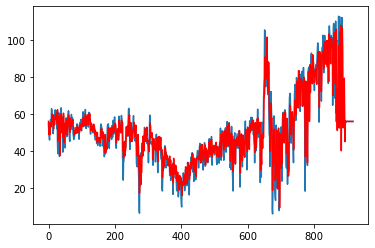

CPU times: user 34min 52s, sys: 7.13 s, total: 34min 59s
Wall time: 35min 4s


In [21]:
%%time
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# splitting into train and test sets

y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

history = [y for y in train]

predictions = list()

# walk-forward validation

for t in range(len(test)):
    model = ARIMA(history, order=(10,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# evaluate forecasts
rmse = mean_squared_error(test, predictions, squared= False)
mae = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

#plotting forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Looking at the plot above, it looks like the model is working quite well. This is also supported by a RMSE of 8.015
, which means the predictions can vary in a bit more than 8 euros from reality. Looking at the distribution of residuals below, I can see they're around 0, and the mean of residuals is almost 0. 

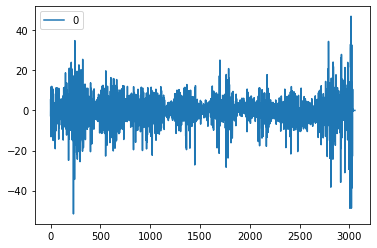

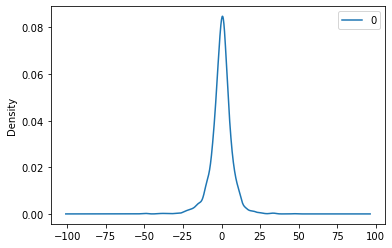

                 0
count  3057.000000
mean      0.000751
std       6.908729
min     -51.612783
25%      -2.963928
50%       0.351309
75%       3.348767
max      47.030734


In [22]:
# line plot of residuals

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals

residuals.plot(kind='kde')
plt.show()

# summary stats of residuals

print(residuals.describe())

In [23]:
from statsmodels.tsa.arima_model import ARIMAResults

#I'm going to save this model so I can load it at any other poin on time if needed

model_fit.save("ARIMA2021nooutliers.pkl")

#To load the model, I would need to use the following code:

loaded_ARIMA = ARIMAResults.load("ARIMA2021nooutliers.pkl")

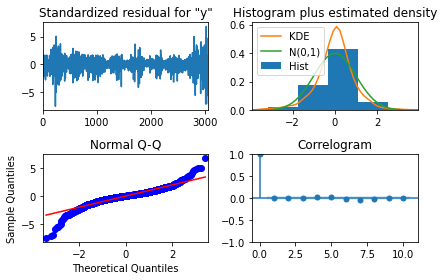

In [24]:
loaded_ARIMA.plot_diagnostics();
plt.tight_layout()

In [25]:
loaded_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3057
Model:                ARIMA(10, 0, 0)   Log Likelihood              -10246.591
Date:                Sat, 15 Jan 2022   AIC                          20517.182
Time:                        16:52:38   BIC                          20589.484
Sample:                             0   HQIC                         20543.164
                               - 3057                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.5388      2.300     24.143      0.000      51.030      60.048
ar.L1          0.7738      0.012     65.683      0.000       0.751       0.797
ar.L2         -0.2002      0.016    -12.644      0.000      -0.231      -0.169
ar.L3          0.1490      0.013     11.339      0.000       0.123       0.175
ar.L4          0.0152      0.016      0.976      0.329      -0.015       0.046
ar.L5          0.0148      0.016      0.919      0.358      -0.017       0.046
ar.L6          0.0610      0.015      4.035      0.000       0.031       0.091
ar.L7          0.3500      0.014     24.404      0.000       0.322       0.378
ar.L8         -0.2316      0.015    -15.076      0.000      -0.262      -0.201
ar.L9          0.0230      0.015      1.491      0.136      -0.007       0.053
ar.L10        -0.0122      0.010     -1.205      0.228      -0.032       0.008
sigma2        47.6865      0.657     72.562      0.000      46.398      48.975
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5794.69
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.59
Prob(H) (two-sided):                  0.98   Kurtosis:                         9.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 3058
Training Observations: 2140
Testing Observations: 918


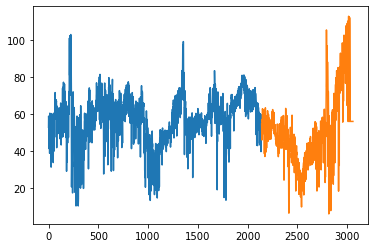

In [27]:
#This shows us in a plot the 3058 observations divided by train (in blue, 2140) and test (in orange, 918)
pd.plotting.register_matplotlib_converters()
plt.plot(train)
plt.plot([None for i in train] + [y for y in test])
plt.show()

### Out of sample forecasting

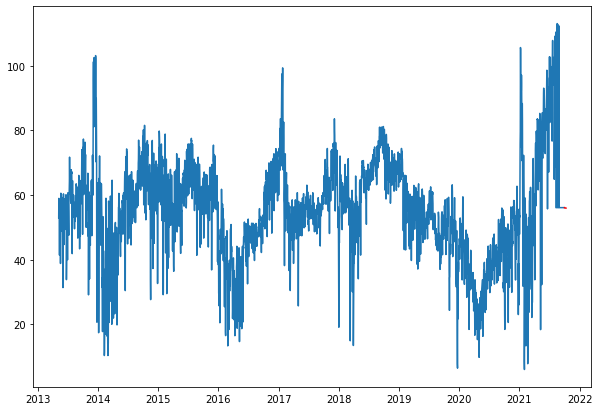

In [28]:
#Creating new rows for 10 days ahead predictions.

rows_predictions = pd.DataFrame(index = pd.date_range("2021-10-01", periods = 10, freq = "D")).rename_axis("Date")
rows_predictions.index = pd.DatetimeIndex(rows_predictions.index, dayfirst= True)

#Out-of-Sample Forecast

rows_predictions["pred"] = loaded_ARIMA.forecast(steps = 10)

#Concatenating predictions to electricity prices dataframe

electricity_price_predictions = pd.concat([electricity_price, pd.DataFrame(rows_predictions)], ignore_index=False)
electricity_price_predictions.index = pd.DatetimeIndex(electricity_price_predictions.index, dayfirst= True)

#Plotting actual values and predictions out of sample

fig, axes = plt.subplots(figsize=(10,7));
plt.plot(electricity_price_predictions.index, electricity_price_predictions["Total €/MWh no outliers"].values)
plt.plot(electricity_price_predictions.index, electricity_price_predictions["pred"].values, color='red')

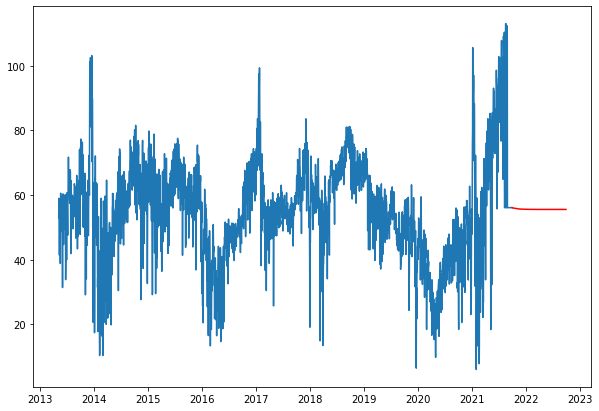

In [29]:
#Creating new rows for 1 year ahead predictions.

rows_predictions = pd.DataFrame(index = pd.date_range("2021-10-01", periods = 365, freq = "D")).rename_axis("Date")
rows_predictions.index = pd.DatetimeIndex(rows_predictions.index, dayfirst= True)

#Out-of-Sample Forecast

rows_predictions["pred"] = loaded_ARIMA.forecast(steps = 365)

#Concatenating predictions to electricity prices dataframe

electricity_price_predictions = pd.concat([electricity_price, pd.DataFrame(rows_predictions)], ignore_index=False)
electricity_price_predictions.index = pd.DatetimeIndex(electricity_price_predictions.index, dayfirst= True)

#Plotting actual values and predictions out of sample

fig, axes = plt.subplots(figsize=(10,7));
plt.plot(electricity_price_predictions.index, electricity_price_predictions["Total €/MWh no outliers"].values)
plt.plot(electricity_price_predictions.index, electricity_price_predictions["pred"].values, color='red')

In [30]:
#Based on the nature of the ARIMA equations, out-of-sample forecasts tend to converge to the sample mean for long forecasting periods.
electricity_price_predictions.tail()

,Total €/MWh no outliers,pred
Date,,
2022-09-26,NaN,55.538804
2022-09-27,NaN,55.538803
2022-09-28,NaN,55.538802
2022-09-29,NaN,55.538801
2022-09-30,NaN,55.538801


In [31]:
electricity_price_predictions.mean()

Total €/MWh no outliers    55.539059
pred                       55.592447
dtype: float64

In [32]:
#import sys
#print(sys.executable)
#!conda info
#!conda list

### Testing for normality - Normalisation and standarisation

In [33]:
y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

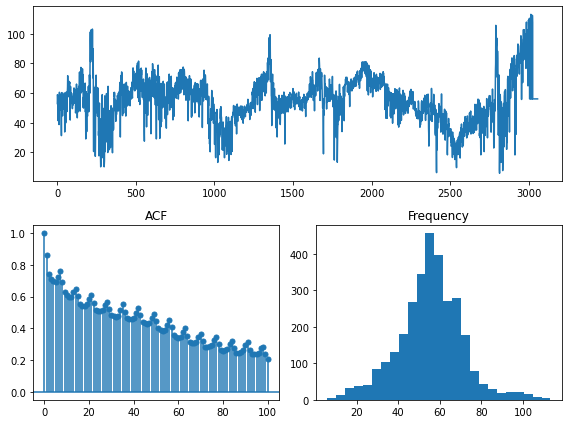

In [34]:
from pmdarima.utils import tsdisplay

tsdisplay(y, lag_max = 100)

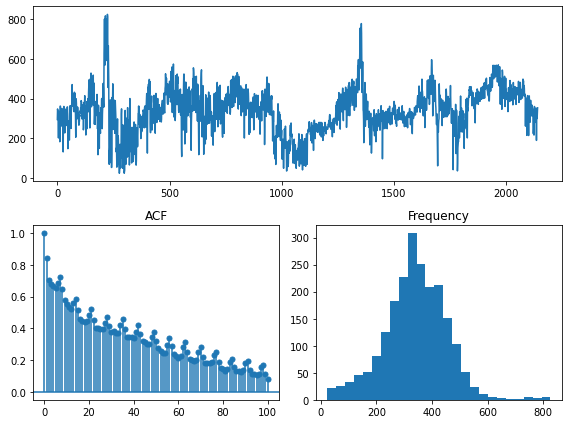

In [35]:
#Box-Cox Transformation

from pmdarima.preprocessing import BoxCoxEndogTransformer

train_bc, _ = BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(train)

tsdisplay(train_bc, lag_max= 100)

In [36]:
k2, p = normaltest(train_bc)

alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 3.04189e-13
The null hypothesis can be rejected


The Box-Cox transformation do not seem to work with my data (it does not transform it so it follows a normal distribution). Therefore, I'm going to try a MinMaxScaler from scikit-learn:

Min: 10.270000, Max: 103.209999
---------
[0.45922095]
[0.5238863]
[0.5129115]
[0.46664512]
[0.46621472]
---------
[52.949997]
[58.96]
[57.94]
[53.640003]
[53.6]


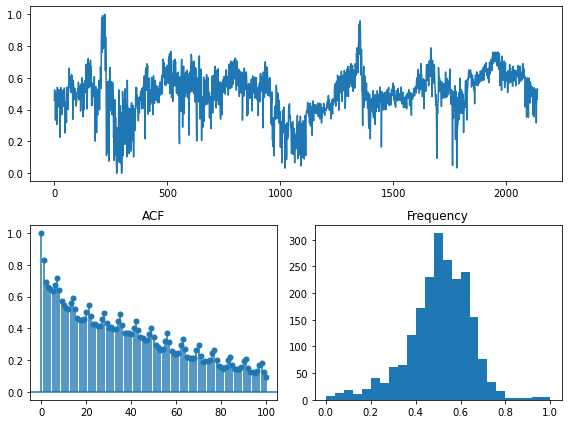

In [37]:
#Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

# train the normalization

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(train)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

print("---------")

# normalise the train dataset and print the first 5 rows

normalised = scaler.transform(train)
for i in range(5):
    print(normalised[i])

print("---------")    
# inverse transform and print the first 5 rows

inversed = scaler.inverse_transform(normalised)
for i in range(5):
    print(inversed[i])
    
tsdisplay(normalised, lag_max= 100)

In [38]:
k2, p = normaltest(normalised)

alpha = 0.05

print(p)

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

[1.43149758e-33]
The null hypothesis can be rejected


The Min-Max scaler also doesn't change the distribution of my data, only the range of the values (between 0 and 1). This might be interesting when using a model with different variables that have different value ranges.

A Standar Scaler (used below) also do not seem to help to transform the electricity prices to follow a Gaussian distribution.

In [39]:
#Standard Scaler

from sklearn.preprocessing import StandardScaler

# train the standardisation

scaler = StandardScaler()
scaler = scaler.fit(train)
print('Mean: %f, Standard Deviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

# standarise the train dataset and print the first 5 rows

normalised = scaler.transform(train)
for i in range(5):
    print(normalised[i])
# inverse transform and print the first 5 rows

inversed = scaler.inverse_transform(normalised)
for i in range(5):
    print(inversed[i])

Mean: 57.360322, Standard Deviation: 13.069662
[-0.3374473]
[0.12239619]
[0.04435281]
[-0.28465337]
[-0.28771394]
[52.95]
[58.96]
[57.94]
[53.64]
[53.6]


In [40]:
k2, p = normaltest(normalised)

alpha = 0.05

print(p)

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

[1.43154127e-33]
The null hypothesis can be rejected


In [41]:
#!conda search --channel conda-forge fitter
#pip install fitter

In [42]:
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div
burr,0.000726,1134.123068,-46613.637049,inf
norm,0.001173,1141.111992,-45161.458217,inf
gamma,0.001230,1135.119214,-45008.640952,inf


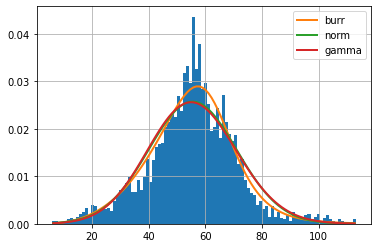

In [43]:
f = Fitter(y,distributions=["gamma","burr","norm"])
f.fit()
f.summary()

In [44]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 10.18078777541811,
  'd': 0.3731934680857649,
  'loc': -0.20297541368486,
  'scale': 65.94655233414686}}

So it seems that electricity prices follow a Burr distribution. However, looking at the sum square error, aic and bic values from the normal distribution and comparing those to the burr distribution, and also looking at the shape of the histogram, I'm going to assume that the electricity prices are Gaussian-like for the purpose of this project.

### Checking Seasonality and Trend

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decomposition_plot(ts):
    
# Apply seasonal_decompose 
    
    decomposition = seasonal_decompose(x = ts, model = "additive",
                                          period= int(len(ts)/2))
    
# Get trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='red')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='orange')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='green')
    plt.legend(loc='best')
    plt.tight_layout()

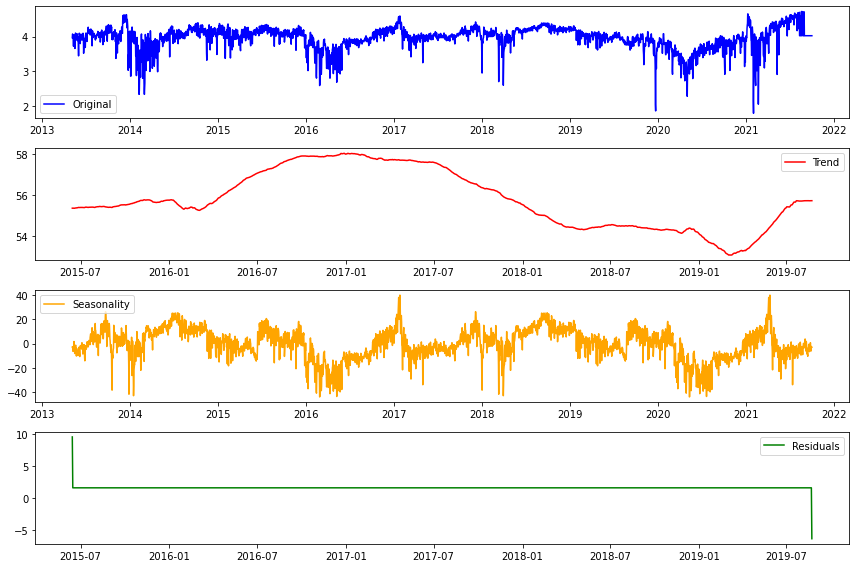

In [46]:
decomposition_plot(electricity_price)

From the plots above, it looks like the electricity prices time series might follow an increasing trend from 2019 but they don't look seasonal.

### Checking autocorrelation

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.ticker import MaxNLocator

def plot_acf_pacf(ts, figsize=(15,8),lags=1000):
    
    fig,ax = plt.subplots(nrows=3, figsize=figsize)
    
    # Plot time series
    ts.plot(ax=ax[0])
    
    # Plot acf, pavf
    plot_acf(ts, ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags) 
    fig.tight_layout()
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

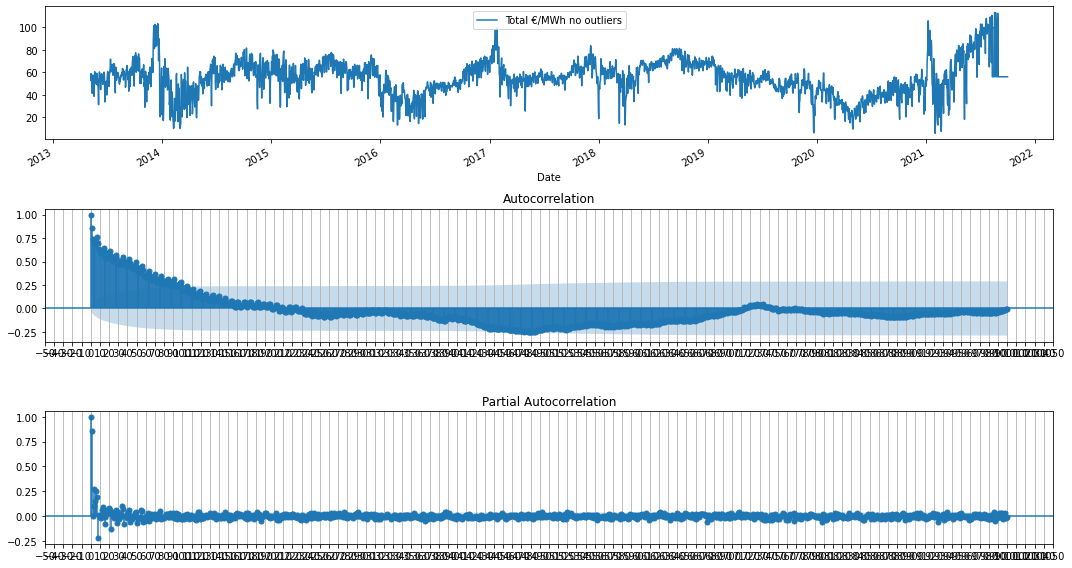

In [48]:
plot_acf_pacf(electricity_price);
plt.tight_layout()

The autocorrelation plots above also confirm that there is no seasonality in the electricity prices.

### Findings
A summary of all the findings related to electricity prices:

- They do not follow a normal distribution, but the distribution is Gaussian-like, so I will assume they are "normal".
- They are not seasonal.
- They are stationary.
- They might follow an increasing trend from 2019.

### Auto-ARIMA

Now, I'm going to improve the ARIMA model, changing its parameters so I'm using the optimal order for the model.

In [49]:
%%time
from pmdarima import auto_arima

y = electricity_price.values

model_auto_ARIMA = auto_arima(y, start_p= 1, start_q= 1, stationary= True, seasonal = False,
                             stepwise= True, error_action= "trace", suppress_warnings= True)

CPU times: user 58.6 s, sys: 148 ms, total: 58.7 s
Wall time: 59.1 s


In [50]:
model_auto_ARIMA

ARIMA(order=(5, 0, 5), scoring_args={}, suppress_warnings=True)

### Walk-forward validation ARIMA

ARIMA(order=(5, 0, 5))

Test RMSE: 8.212
Test MAE: 67.434


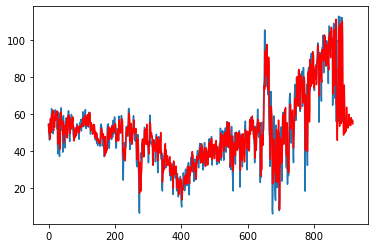

CPU times: user 1h 1min 29s, sys: 4.63 s, total: 1h 1min 34s
Wall time: 58min 24s


In [51]:
%%time
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# splitting into train and test sets

y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

history = [y for y in train]

predictions = list()

# walk-forward validation

for t in range(len(test)):
    model = ARIMA(history, order=(5,0,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# evaluate forecasts

rmse = mean_squared_error(test, predictions, squared= False)
mae = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

# plotting forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [52]:
#I'm going to save this model so I can load it at any other poin on time if needed

model_fit.save("optimisedARIMA2021nooutliers.pkl")

#To load the model, I would need to use the following code:

loaded_ARIMA = ARIMAResults.load("optimisedARIMA2021nooutliers.pkl")

### Out of sample forecasting

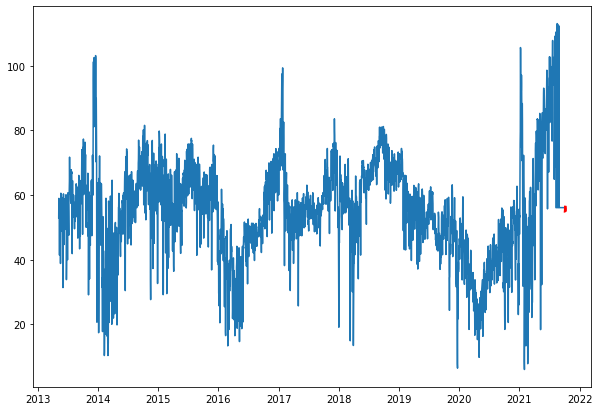

In [53]:
#Creating new rows for 10 days ahead predictions.

rows_predictions = pd.DataFrame(index = pd.date_range("2021-10-01", periods = 10, freq = "D")).rename_axis("Date")
rows_predictions.index = pd.DatetimeIndex(rows_predictions.index, dayfirst= True)

#Out-of-Sample Forecast

rows_predictions["pred"] = loaded_ARIMA.forecast(steps = 10)

#Concatenating predictions to electricity prices dataframe

electricity_price_predictions = pd.concat([electricity_price, pd.DataFrame(rows_predictions)], ignore_index=False)
electricity_price_predictions.index = pd.DatetimeIndex(electricity_price_predictions.index, dayfirst= True)

#Plotting actual values and predictions out of sample

fig, axes = plt.subplots(figsize=(10,7));
plt.plot(electricity_price_predictions.index, electricity_price_predictions["Total €/MWh no outliers"].values)
plt.plot(electricity_price_predictions.index, electricity_price_predictions["pred"].values, color='red')

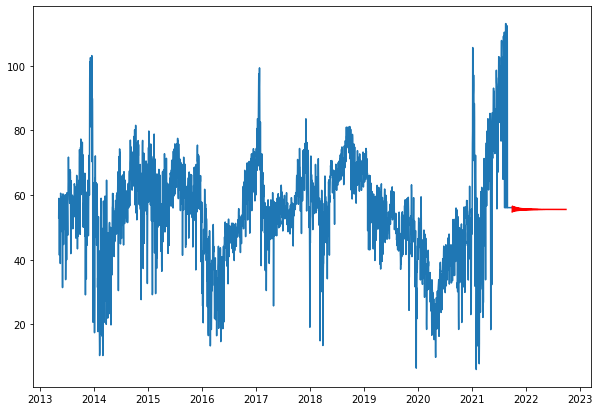

In [54]:
#Creating new rows for 1 year ahead predictions.

rows_predictions = pd.DataFrame(index = pd.date_range("2021-10-01", periods = 365, freq = "D")).rename_axis("Date")
rows_predictions.index = pd.DatetimeIndex(rows_predictions.index, dayfirst= True)

#Out-of-Sample Forecast

rows_predictions["pred"] = loaded_ARIMA.forecast(steps = 365)

#Concatenating predictions to electricity prices dataframe

electricity_price_predictions = pd.concat([electricity_price, pd.DataFrame(rows_predictions)], ignore_index=False)
electricity_price_predictions.index = pd.DatetimeIndex(electricity_price_predictions.index, dayfirst= True)

#Plotting actual values and predictions out of sample

fig, axes = plt.subplots(figsize=(10,7));
plt.plot(electricity_price_predictions.index, electricity_price_predictions["Total €/MWh no outliers"].values)
plt.plot(electricity_price_predictions.index, electricity_price_predictions["pred"].values, color='red')

In [55]:
#Based on the nature of the ARIMA equations, out-of-sample forecasts tend to converge to the sample mean for long forecasting periods.
electricity_price_predictions.tail(10)

,Total €/MWh no outliers,pred
Date,,
2022-09-21,NaN,55.539607
2022-09-22,NaN,55.537472
2022-09-23,NaN,55.537860
2022-09-24,NaN,55.539747
2022-09-25,NaN,55.538530
2022-09-26,NaN,55.537252
2022-09-27,NaN,55.538997
2022-09-28,NaN,55.539450
2022-09-29,NaN,55.537564


In [56]:
electricity_price_predictions.mean()

Total €/MWh no outliers    55.539059
pred                       55.555348
dtype: float64

The above ARIMA model works a bit worse than the first one, with a RMSE of 8.212 euros.

Still, I'm only using the past electricity prices to forecast.

Now, I'm going to use different models that take into account other variables of my dataset.

## Vector Auto Regression (VAR)

In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables.

The VAR class assumes that the passed time series are stationary. Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method: https://www.statsmodels.org/dev/vector_ar.html?highlight=var%20model#module-statsmodels.tsa.vector_ar.var_model

Electricity prices until 2021 without outliers are stationary, but I will also check if all the other variables are stationary or not.

### Testing stationary in relevant variables - ADF

In [57]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('Dickey-Fuller Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [58]:
print('Augmented Dickey-Fuller Test: Total energy MWh Time Series')
augmented_dickey_fuller_statistics(models_dataset['Energía final MWh'])

print('Augmented Dickey-Fuller Test: Closing price Brent Time Series')
augmented_dickey_fuller_statistics(models_dataset['Precio cierre Brent'])

print('Augmented Dickey-Fuller Test: Maximum temperature Time Series')
augmented_dickey_fuller_statistics(models_dataset['Tmax'])

print('Augmented Dickey-Fuller Test: Minimum temperature Time Series')
augmented_dickey_fuller_statistics(models_dataset['Tmin'])

print('Augmented Dickey-Fuller Test: Average Wind Speed (Km/h) Time Series')
augmented_dickey_fuller_statistics(models_dataset['Vmax'])

Augmented Dickey-Fuller Test: Total energy MWh Time Series
Dickey-Fuller Statistic: -6.473755
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: Closing price Brent Time Series
Dickey-Fuller Statistic: -1.830950
p-value: 0.365208
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: Maximum temperature Time Series
Dickey-Fuller Statistic: -3.389036
p-value: 0.011338
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: Minimum temperature Time Series
Dickey-Fuller Statistic: -3.550541
p-value: 0.006780
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: Average Wind Speed (Km/h) Time Series
Dickey-Fuller Statistic: -9.387376
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567


Looking at the p-value of all variables above, we can determine that the Brent oil crude prices are a non-stationary series, while all the other variables are stationary.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Let's double check that this the case:

In [59]:
years = models_dataset.resample("Y").mean()
years

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Tmax,Tmin,Vmax
Date,,,,,,
2013-12-31,59.655544,710924.0000,108.124161,23.422705,11.830986,17.965405
2014-12-31,53.299641,711462.1250,99.428925,21.159153,10.430418,18.798601
2015-12-31,61.178432,726983.7500,53.678406,21.514978,10.195574,17.935427
2016-12-31,47.257324,733801.4375,45.110409,21.130482,10.079815,18.131355
2017-12-31,59.263626,741894.8125,54.847801,21.954067,9.988770,17.772390
2018-12-31,63.564960,736320.6250,71.565346,20.759390,10.043809,18.209433
2019-12-31,52.481125,733829.3750,64.198654,21.520739,9.914580,18.635952
2020-12-31,39.028233,709097.6250,43.268894,21.589195,10.417952,17.735336
2021-12-31,68.777657,731663.7500,67.831139,22.350803,10.986921,18.442453


In [60]:
years.describe()

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Tmax,Tmin,Vmax
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,56.056282,726219.750000,67.561523,21.711279,10.432092,18.180706
std,9.051579,12441.157227,22.739929,0.793325,0.618476,0.376233
min,39.028233,709097.625000,43.268894,20.759390,9.914580,17.735336
25%,52.481125,711462.125000,53.678406,21.159153,10.043809,17.935427
50%,59.263626,731663.750000,64.198654,21.520739,10.195574,18.131355
75%,61.178432,733829.375000,71.565346,21.954067,10.430418,18.442453
max,68.777657,741894.812500,108.124161,23.422705,11.830986,18.798601


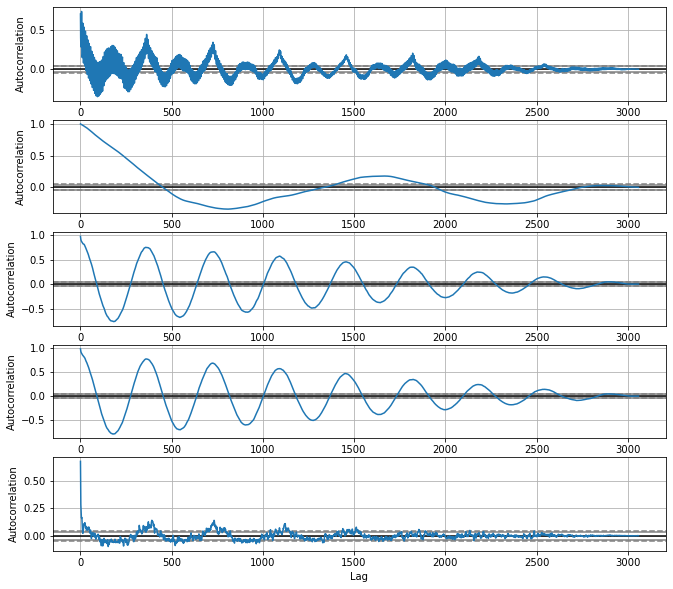

In [61]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(11,10))

autocorrelation_plot(models_dataset["Energía final MWh"], ax= ax1)
autocorrelation_plot(models_dataset["Precio cierre Brent"], ax = ax2)
autocorrelation_plot(models_dataset["Tmax"], ax = ax3)
autocorrelation_plot(models_dataset["Tmin"], ax = ax4)
autocorrelation_plot(models_dataset["Vmax"], ax = ax5);

Looking at the autocorrelation plots, the Brent oil crude prices do not seem to be constant over time. Same conclusion if we look at the mean and the standard deviation of each series over the years.

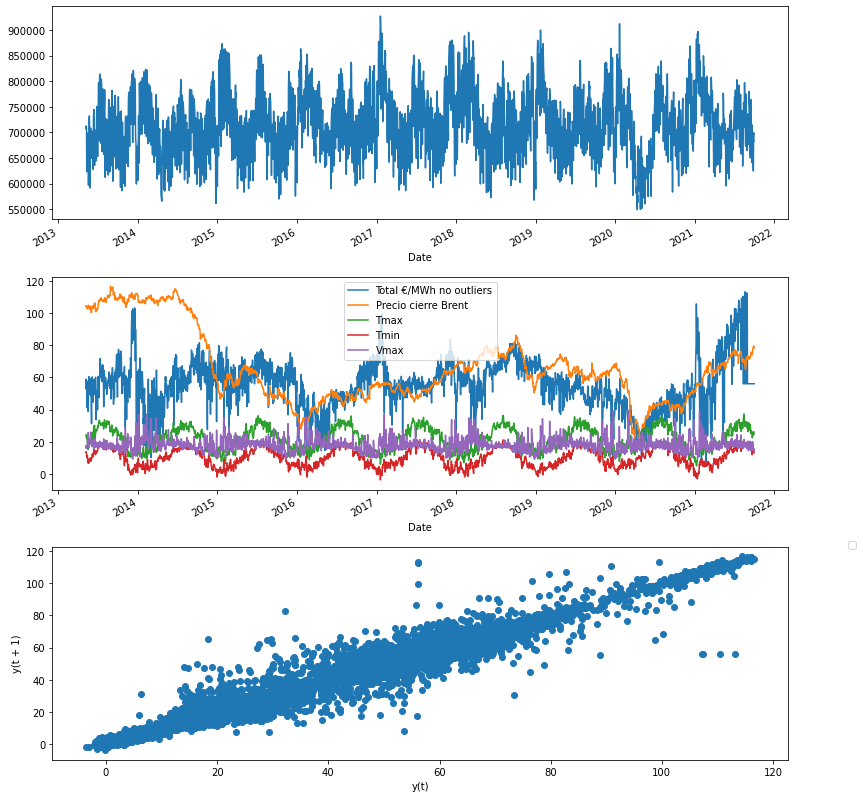

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12,11))

#series plot

models_dataset["Energía final MWh"].plot(ax = ax1)

models_dataset.drop("Energía final MWh", axis = 1).plot(ax = ax2)

plt.legend(bbox_to_anchor=(1.1, 1.05), loc="upper right")

plt.tight_layout()

#lag plot
pd.plotting.lag_plot(models_dataset.drop("Energía final MWh", axis = 1))
plt.show()

The plot above shows some relationships among the series,showing also some outliers.

The linear shape of the lag plot indicates the presence of positive auto-correlation.

### First order differencing for non-stationary series and removing seasonality from series

Let's now transform the electricity prices and Brent oil crude future prices to make them stationary and let's remove seasonality from the other variables.

I'll use a Standar Scaler to standardise features by removing the mean and scaling to unit variance.

In [63]:
#creating the train and validation set

train = models_dataset[:int(0.7*(len(models_dataset)))]
test = models_dataset[int(0.7*(len(models_dataset))):]

print(train.shape)
print(test.shape)

(2140, 6)
(918, 6)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaler = scaler.fit(train)
normalised_train = pd.DataFrame(train_scaler.transform(train), columns = models_dataset.columns, index = train.index)

normalised_train_diff = (normalised_train).diff().fillna(0)
normalised_train_diff.describe()

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Tmax,Tmin,Vmax
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,0.000237,0.000283,-0.000731,-0.000377,-0.000868,-0.000062
std,0.583255,0.788696,0.041587,0.226230,0.232507,0.792551
min,-3.290828,-2.279049,-0.228710,-0.961849,-1.141342,-4.053410
25%,-0.293045,-0.471699,-0.015499,-0.132574,-0.132677,-0.390479
50%,-0.019128,-0.049394,0.000000,0.011323,-0.001784,-0.024575
75%,0.254980,0.305941,0.014661,0.150274,0.133349,0.404602
max,2.728456,2.640245,0.187240,0.745216,1.052309,3.928554


Looking at the plots below, it could be understood that the dataset looks like normalised:

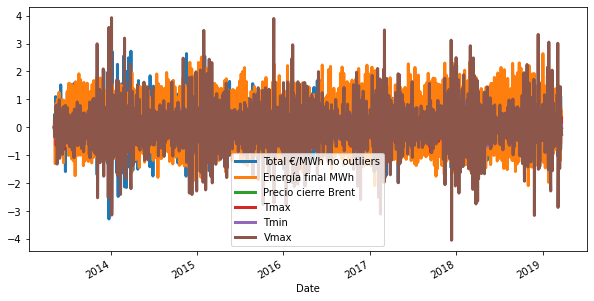

In [65]:
normalised_train_diff.plot(figsize=(10,5), linewidth = 3);

### Testing stationary in transformed series - ADF

In [66]:
print('Augmented Dickey-Fuller Test: Total energy MWh Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Energía final MWh'])

print('Augmented Dickey-Fuller Test: Total €/MWh Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Total €/MWh no outliers'])

print('Augmented Dickey-Fuller Test: Closing price Brent Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Precio cierre Brent'])

print('Augmented Dickey-Fuller Test: Maximum temperature Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Tmax'])

print('Augmented Dickey-Fuller Test: Minimum temperature Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Tmin'])

print('Augmented Dickey-Fuller Test: Average Wind Speed (Km/h) Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Vmax'])

Augmented Dickey-Fuller Test: Total energy MWh Time Series
Dickey-Fuller Statistic: -12.736943
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Augmented Dickey-Fuller Test: Total €/MWh Time Series
Dickey-Fuller Statistic: -12.708062
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Augmented Dickey-Fuller Test: Closing price Brent Time Series
Dickey-Fuller Statistic: -49.123142
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Augmented Dickey-Fuller Test: Maximum temperature Time Series
Dickey-Fuller Statistic: -11.985254
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Augmented Dickey-Fuller Test: Minimum temperature Time Series
Dickey-Fuller Statistic: -8.616412
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Augmented Dickey-Fuller Test: Average Wind Speed (Km/h) Time Series
Dickey-Fuller Statistic: -16.403390
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863

All time series are now stationary.

In [67]:
#The Johansen Test can be used to check for cointegration between a maximum of 12-time series.

from statsmodels.tsa.vector_ar.vecm import coint_johansen

coint_johansen(normalised_train_diff,0,1).eig

array([0.5374569 , 0.50756135, 0.49853985, 0.45836718, 0.37881123,
       0.34623428])

In [68]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
cointegration_rank = select_coint_rank(normalised_train_diff,0,1)
print(cointegration_rank)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   6          7876.          95.75
  1   6          6228.          69.82
  2   6          4713.          47.85
  3   6          3238.          29.80
  4   6          1927.          15.49
  5   6          908.7          3.841
-------------------------------------


The test statistics are higher than the critical values for all variables(series). This means the null hypotesis can be rejected at a 95% confidence level.

The null hypotesis was that the variables are not cointegrated, so rejecting the null hypotesis means that the variables (series) are cointegrated.

### Lag order selection VAR and model fitting and predictions

In [69]:
#Adding the period to the index, otherwise I get a warning saying the date won't be taken into consideration when forecasting
normalised_train_diff.index = pd.DatetimeIndex(normalised_train_diff.index, dayfirst= True).to_period("D")

In [70]:
#Initiating the VAR model and using AIC to determine the lag order value

from statsmodels.tsa.vector_ar.var_model import VAR

model_VAR = VAR(endog= normalised_train_diff)
res = model_VAR.select_order(20)
res.summary()

,AIC,BIC,FPE,HQIC
0,-15.33,-15.32,2.195e-07,-15.33
1,-15.70,-15.59,1.518e-07,-15.66
2,-16.08,-15.87,1.044e-07,-16.00
3,-16.17,-15.87,9.500e-08,-16.06
4,-16.30,-15.90,8.349e-08,-16.15
5,-16.68,-16.18,5.713e-08,-16.50
6,-16.88,-16.28,4.682e-08,-16.66
7,-17.26,-16.57*,3.181e-08,-17.01*
8,-17.26,-16.47,3.208e-08,-16.97
9,-17.24,-16.36,3.256e-08,-16.92


In [71]:
#fitting the model
model_fit_VAR = model_VAR.fit(maxlags= 15)

#predictions on validation

prediction_VAR = model_fit_VAR.forecast(model_fit_VAR.y, steps=len(test))
prediction_VAR


array([[-3.48934655e-01, -9.26459357e-01,  1.08196426e-03,
         5.16269560e-02,  1.46058081e-01,  7.94252730e-03],
       [-4.20717299e-01, -3.76092495e-01,  3.45920786e-03,
        -5.56405497e-02,  6.48607632e-02,  3.76918868e-02],
       [ 5.37455444e-01,  9.47648991e-01, -1.72958943e-05,
        -2.72337519e-03,  3.89457778e-02,  2.03734212e-02],
       ...,
       [ 9.89021771e-05,  4.06531522e-04, -7.29697530e-04,
         2.05099767e-06, -3.25192050e-04, -1.89022920e-04],
       [ 1.01935558e-04,  4.12940583e-04, -7.29732984e-04,
         2.31613130e-06, -3.25197820e-04, -1.89072654e-04],
       [ 1.09450035e-04,  4.29211736e-04, -7.29781211e-04,
         2.32849307e-06, -3.25115147e-04, -1.89661615e-04]])

The array above shows the predictions, where each list represents the predictions of each row.

I need to invert the transformation I did before to its original scale, and also let's present the results in a Dataframe format:

In [72]:
#transforming the predictions into a Dataframe

cols = models_dataset.columns

pred = pd.DataFrame(index= test.index,columns=cols)

for j in range(0,6):
    for i in range(0, len(prediction_VAR)):
       pred.iloc[i][j] = prediction_VAR[i][j]

pred

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Tmax,Tmin,Vmax
Date,,,,,,
2019-03-23,-0.348935,-0.926459,0.00108196,0.051627,0.146058,0.00794253
2019-03-24,-0.420717,-0.376092,0.00345921,-0.0556405,0.0648608,0.0376919
2019-03-25,0.537455,0.947649,-1.72959e-05,-0.00272338,0.0389458,0.0203734
2019-03-26,-0.00475671,0.213777,-0.00337731,-0.0451135,0.0403517,0.171771
2019-03-27,0.0624929,0.225923,0.00102902,0.0285725,-0.00459254,-0.0848457
...,...,...,...,...,...,...
2021-09-26,0.000104348,0.000418567,-0.000729714,2.20326e-06,-0.000325212,-0.000189583
2021-09-27,0.000103552,0.00041602,-0.000729707,2.02151e-06,-0.000325159,-0.000189388
2021-09-28,9.89022e-05,0.000406532,-0.000729698,2.051e-06,-0.000325192,-0.000189023


To bring it back up to its original scale, I need to de-difference to the original input data.

In [73]:
pred.dtypes

Total €/MWh no outliers    object
Energía final MWh          object
Precio cierre Brent        object
Tmax                       object
Tmin                       object
Vmax                       object
dtype: object

In [74]:
#Let's converts each column to the correct data type

pred['Energía final MWh'] = pred[['Energía final MWh']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Total €/MWh no outliers'] = pred[['Total €/MWh no outliers']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio cierre Brent'] = pred[['Precio cierre Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmax"] = pred[["Tmax"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmin"] = pred[["Tmin"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Vmax"] = pred[["Vmax"]].apply(pd.to_numeric, downcast="float", errors= "coerce")

In [75]:
type(pred)

pandas.core.frame.DataFrame

In [76]:
#inverting transformation

def invert_transformation(train, pred_df):
    forecast = pred.copy()
    columns = train.columns
    for col in columns:
        forecast[str(col)] = train[col].iloc[-1] + forecast[str(col)].cumsum()
    return forecast

output = invert_transformation(normalised_train_diff, pred)
output_original = pd.DataFrame(train_scaler.inverse_transform(output), columns= train.columns, index= test.index)

In [77]:
output_original

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Tmax,Tmin,Vmax
Date,,,,,,
2019-03-23,55.519867,658642.8750,68.819359,24.021469,11.242330,17.114679
2019-03-24,50.021233,634296.5000,68.901939,23.632853,11.609587,17.270687
2019-03-25,57.045593,695642.6250,68.901527,23.613831,11.830107,17.355015
2019-03-26,56.983425,709481.5000,68.820900,23.298738,12.058587,18.065983
2019-03-27,57.800186,724106.6875,68.845467,23.498302,12.032583,17.714802
...,...,...,...,...,...,...
2021-09-26,57.218639,722071.9375,53.021751,23.260447,10.114727,17.316175
2021-09-27,57.219994,722098.8125,53.004333,23.260460,10.112886,17.315392
2021-09-28,57.221287,722125.1875,52.986912,23.260473,10.111045,17.314610


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#Checking the Root Mean Square Error

for i in cols:
    print('RMSE for', i, 'is: ', sqrt(mean_squared_error(output_original[i], test[i])))

RMSE for Total €/MWh no outliers is:  19.96566724786186
RMSE for Energía final MWh is:  63678.52661612076
RMSE for Precio cierre Brent is:  15.275091322705478
RMSE for Tmax is:  6.938400347597775
RMSE for Tmin is:  5.357396241508126
RMSE for Vmax is:  3.961423343755028


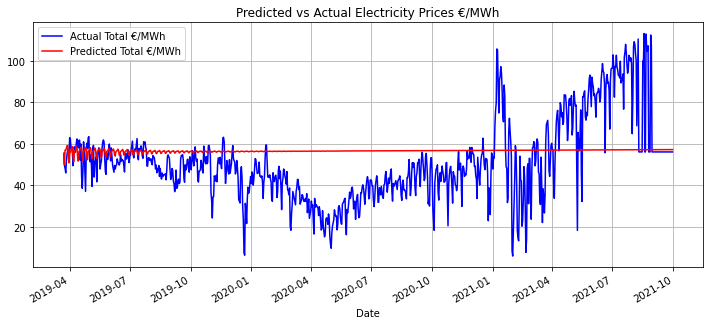

In [79]:
plt.figure(figsize=(12,5))
plt.xlabel("Date")

ax1 = test["Total €/MWh no outliers"].plot(color= "blue", grid = True, label = "Actual Total €/MWh")
ax2 = output_original["Total €/MWh no outliers"].plot(color= "red", grid = True, label = "Predicted Total €/MWh")

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title( "Predicted vs Actual Electricity Prices €/MWh")
plt.show()

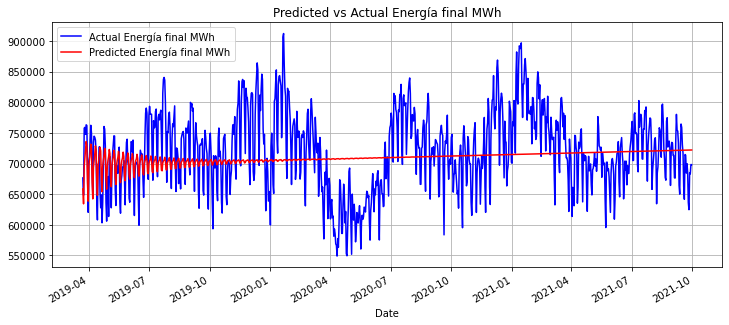

In [80]:
plt.figure(figsize=(12,5))
plt.xlabel("Date")

ax1 = test["Energía final MWh"].plot(color= "blue", grid = True, label = "Actual Energía final MWh")
ax2 = output_original["Energía final MWh"].plot(color= "red", grid = True, label = "Predicted Energía final MWh")

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title( "Predicted vs Actual Energía final MWh")
plt.show()

What the graphs above show, is that these models do not work very well with long-term forecasts, and they tend to converge to the sample mean for long forecasting periods.

In [81]:
output_original.describe()

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Tmax,Tmin,Vmax
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,56.597519,709702.000000,60.939610,23.255693,10.951745,17.670090
std,0.739867,10439.725586,4.619206,0.048528,0.489969,0.211467
min,50.021233,634296.500000,52.952068,22.894960,10.107363,17.114679
25%,56.444879,705730.468750,56.945808,23.251778,10.529461,17.490481
50%,56.671690,710640.187500,60.939409,23.254632,10.951557,17.670015
75%,56.959556,716428.859375,64.932480,23.257812,11.371511,17.847035
max,59.171246,736099.562500,68.989830,24.021469,12.414420,18.550812


In [82]:
#I'm going to save this model so I can load it at any other poin on time if needed

dump(model_fit_VAR, open("model_VAR2021nooutliers.pkl", "wb"))

#To load the model, I would need to use the following code:

VAR_loaded = load(open("model_VAR2021nooutliers.pkl", "rb"))

In [83]:
VAR_loaded.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 15, Jan, 2022
Time:                     17:53:01
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -15.8474
Nobs:                     2125.00    HQIC:                  -16.7696
Log likelihood:           838.019    FPE:                3.06146e-08
AIC:                     -17.3021    Det(Omega_mle):     2.38048e-08
--------------------------------------------------------------------
Results for equation Total €/MWh no outliers
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                               0.000520         0.009716            0.054           0.957
L1.Total €/MWh no outliers         -0.362853         0.028931          -12.542   

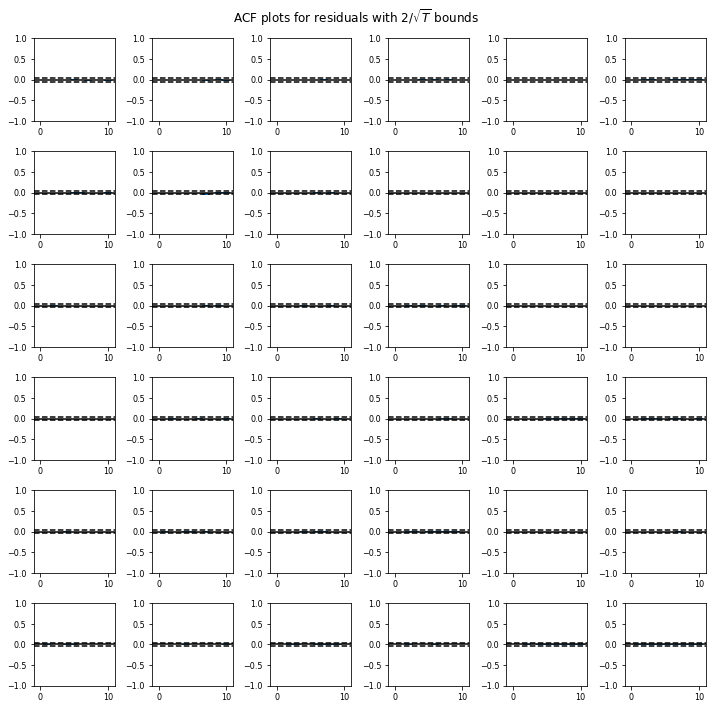

In [84]:
VAR_loaded.plot_acorr();
plt.tight_layout()

In [85]:
VAR_loaded.stderr

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Tmax,Tmin,Vmax
const,0.009716,0.009678,0.000904,0.004397,0.004331,0.015636
L1.Total €/MWh no outliers,0.028931,0.028817,0.002693,0.013092,0.012896,0.046558
L1.Energía final MWh,0.023942,0.023848,0.002228,0.010834,0.010672,0.038530
L1.Precio cierre Brent,0.238420,0.237480,0.022192,0.107891,0.106272,0.383685
L1.Tmax,0.054169,0.053956,0.005042,0.024513,0.024145,0.087174
...,...,...,...,...,...,...
L15.Energía final MWh,0.023811,0.023718,0.002216,0.010775,0.010614,0.038319
L15.Precio cierre Brent,0.239633,0.238688,0.022305,0.108440,0.106813,0.385637
L15.Tmax,0.055671,0.055452,0.005182,0.025193,0.024815,0.089591
L15.Tmin,0.051246,0.051044,0.004770,0.023190,0.022842,0.082470


In [86]:
#Adding the period to the index, otherwise I get a warning saying the date won't be taken into consideration when forecasting
models_dataset.index = pd.DatetimeIndex(models_dataset.index, dayfirst= True).to_period("D")

#predictions for 2 day ahead

model_VAR2021 = VAR(endog=models_dataset)
model_fit_VAR2021 = model_VAR2021.fit()
yhat = model_fit_VAR2021.forecast(model_fit_VAR2021.y, steps=2)
print(yhat)

[[5.55281378e+01 7.00507969e+05 7.84708945e+01 2.52172319e+01
  1.34990724e+01 1.53027100e+01]
 [5.53244498e+01 7.03235348e+05 7.84268286e+01 2.53125543e+01
  1.34857634e+01 1.62655606e+01]]


In [87]:
#transforming the predictions into a Dataframe

cols = models_dataset.columns

index = pd.date_range("2021-10-01", periods = 2, freq = "D")

forecast_VAR2021 = pd.DataFrame(index= index,columns=cols)

for j in range(0,6):
    for i in range(0, len(yhat)):
       forecast_VAR2021.iloc[i][j] = yhat[i][j]
    
forecast_VAR2021.index = pd.DatetimeIndex(forecast_VAR2021.index, dayfirst= True).to_period("D")

forecast_VAR2021

,Total €/MWh no outliers,Energía final MWh,Precio cierre Brent,Tmax,Tmin,Vmax
2021-10-01,55.5281,700508,78.4709,25.2172,13.4991,15.3027
2021-10-02,55.3244,703235,78.4268,25.3126,13.4858,16.2656


Let's now compare this forecast with that it actually happened in the first 2 days of October of 2021:

In [88]:
electricity_prices_oct_2021 = pd.read_excel("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Provisionales_2021/PFMDIASM_TOD_202110/PFMDIASM_TOD_20211001_20211031.xls",
                                            dtype= str,parse_dates= True, engine= None, header = 3, usecols= ["Energía\n final \nMWh","Periodo","Total\n€/MWh"],
                                           nrows= 2)
electricity_prices_oct_2021[["Date", "Day"]] = electricity_prices_oct_2021.Periodo.str.split(expand= True)
electricity_prices_oct_2021["Date"] = pd.to_datetime(electricity_prices_oct_2021["Date"], dayfirst=True)
electricity_prices_oct_2021.set_index("Date", inplace=True)
electricity_prices_oct_2021.index = pd.DatetimeIndex(electricity_prices_oct_2021.index, dayfirst= True).to_period("D")
electricity_prices_oct_2021

,Periodo,Energía\n final \nMWh,Total\n€/MWh,Day
Date,,,,
2021-10-01,01/10/21 Viernes,686294.743,220.26,Viernes
2021-10-02,02/10/21 Sábado,672401.608,175.36,Sábado


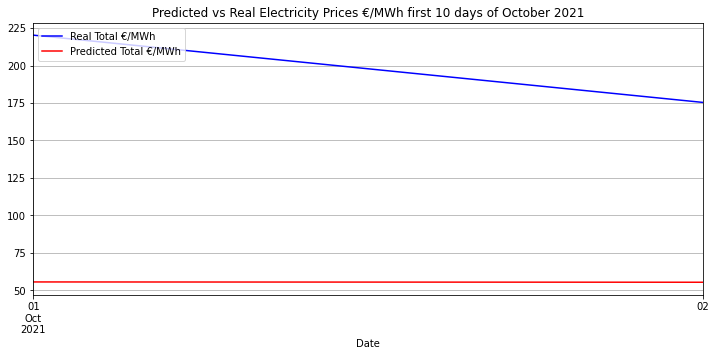

In [89]:
forecast_VAR2021['Total €/MWh no outliers'] = forecast_VAR2021[['Total €/MWh no outliers']].apply(pd.to_numeric, downcast="float", errors= "coerce")
electricity_prices_oct_2021['Total\n€/MWh'] = electricity_prices_oct_2021[['Total\n€/MWh']].apply(pd.to_numeric, downcast="float", errors= "coerce")

plt.figure(figsize=(12,5))
plt.xlabel("Date")

ax1 = electricity_prices_oct_2021["Total\n€/MWh"].plot(color= "blue", grid = True, label = "Real Total €/MWh")
ax2 = forecast_VAR2021["Total €/MWh no outliers"].plot(color= "red", grid = True, label = "Predicted Total €/MWh")

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title( "Predicted vs Real Electricity Prices €/MWh first 10 days of October 2021")
plt.show()

In [90]:
historical_brent = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/historic_brent_prices.csv", dtype= str, sep= ";",
                               usecols= ["Date", "Último", "Apertura", "Máximo", "Mínimo"])

historical_brent["Date"] = pd.to_datetime(historical_brent["Date"], dayfirst=True)

In [91]:
days = pd.DataFrame(index = pd.date_range("2013-01-02", periods = 3196, freq = "D")).rename_axis("Date")

historical_brent_prices_allweek = pd.merge(days, historical_brent, on= "Date", indicator = True, how= "left")

#I'm going to use Friday's price for the weekend (as this is the latest price) and the previous day's price for the bank holidays
historical_brent_prices_allweek = historical_brent_prices_allweek.fillna(method= "ffill")
historical_brent_prices_allweek.set_index("Date", inplace= True)

In [92]:
historical_brent_prices_allweek.loc["2021-10-01":"2021-10-02"]

,Último,Apertura,Máximo,Mínimo,_merge
Date,,,,,
2021-10-01,"79,28","78,49","79,41","77,55",both
2021-10-02,"79,28","78,49","79,41","77,55",left_only


As a summary, I think the model is working quiet well with short-term predictions with the Brent prices, but does not work with the electricity prices after removing outliers because prices in October of 2021 were almost 4 times higher than the median of prices between 2013-2021.

Therefore, the huge increase seen in the market was not possible to predict looking at historical prices removing outliers.